# Démonstration de pré-traitements pour l'analyse de sentiments

Nous allons analyser un corpus de tweets associés à un sentiment positif (1) ou négatif pour savoir combien de fois un mot apparait dans un tweet positif ou négatif. 

## Setup

In [1]:
import nltk                                  # Librairie de TAL
import matplotlib.pyplot as plt              # librairie de visualisation
import numpy as np                           # Librairie de calcul scientifique
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
import string
from nltk.corpus import twitter_samples  
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\azoua\AppData\Roaming\nltk_data...


True

## Affichage des mots outils et des signes de ponctuation

In [2]:
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nSignes de ponctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

## Chargement de l'ensemble de données à partir de la librairie NLTK

In [3]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\azoua\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\azoua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Retrouver les tweets positifs et négatifs

In [4]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')
tweets =pos_tweets +neg_tweets
print("Nombre de tweets: ", len(tweets))
print('Nombre de tweets positifs: ', len(pos_tweets))
print('Nombre de tweets négatifs: ', len(neg_tweets))


Nombre de tweets:  10000
Nombre de tweets positifs:  5000
Nombre de tweets négatifs:  5000


## Illustration de la segmentation

In [5]:
tweet = pos_tweets[1510]

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet)

print('Tweet')
print(tweet)

print('Tweet segmenté:')
print(tweet_tokens)

Tweet
@TheBookwormBaby Thank you! that's very kind.  I just finished working on more Little Explorers books btw which will be out next year.. :)
Tweet segmenté:
['thank', 'you', '!', "that's", 'very', 'kind', '.', 'i', 'just', 'finished', 'working', 'on', 'more', 'little', 'explorers', 'books', 'btw', 'which', 'will', 'be', 'out', 'next', 'year', '..', ':)']


## Suppression des mots-outils et des signes de ponctuation

In [6]:
tweets_clean = []

for word in tweet_tokens:
    if (word not in stopwords_english and  
        word not in string.punctuation): 
        tweets_clean.append(word)
print(tweets_clean)

['thank', "that's", 'kind', 'finished', 'working', 'little', 'explorers', 'books', 'btw', 'next', 'year', '..', ':)']


## Illustration de la racinisation

In [7]:
def stem(tweets_clean):
    stemmer = PorterStemmer() 
    tweets_stem = [] 
    for word in tweets_clean:
        stem_word = stemmer.stem(word) 
        tweets_stem.append(stem_word) 
    print('Racines:')
    print(tweets_stem)
    return tweets_stem

stem(tweets_clean)

Racines:
['thank', "that'", 'kind', 'finish', 'work', 'littl', 'explor', 'book', 'btw', 'next', 'year', '..', ':)']


['thank',
 "that'",
 'kind',
 'finish',
 'work',
 'littl',
 'explor',
 'book',
 'btw',
 'next',
 'year',
 '..',
 ':)']

## Illustration de la lemmatisation

A vous de jouer.

In [8]:
#def lemmatize(tweets_clean):
  #CODE

#lemmatize(tweets_clean)

## Pré-traitement du corpus

In [9]:
def traiter_tweet(tweet):
    """
    Input:
        tweet
    Output:
        une liste des mots du tweet après pré-traitement
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # suppression du #
    tweet = re.sub(r'#', '', tweet)
    # Segmentation
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweet_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation): 
            stem_word = stemmer.stem(word)  
            tweet_clean.append(stem_word)

    return tweet_clean


## Représentation des tweets
créer une représentation numpy array de 10 000 éléments contenant 5000 éléments avec une valeur de 1 et 5000 avec une valeur de 0 

In [10]:
labels = np.append(np.ones((len(pos_tweets))), np.zeros((len(neg_tweets))))

## Création d'un dictionnaire Python 

Fonction de création du dictionnaire. Chaque clé du dictionnaire est une paire de (mot,label (1/0)). La valeur est la fréquence du mot dans les tweets du label correspondant. Exemple : (happy,1) : 25

In [11]:
def creer_freqs(tweets, labelArray):
    """ compte de fréquences.
    Input:
        tweets
        labelArray: un tableau avec le label pour chaque tweet (1/0)
    Output:
        freqs: un dictionnaire de paires (mot, label) et leurs fréquences
    """
    labelList = np.squeeze(labelArray).tolist()
    freqs = {}
    for y, tweet in zip(labelList, tweets):
        for word in traiter_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

Nous allons maintenant construire un dictionnaire de paires de (mot,sentiment (1/0)) associées à leur fréquence d'occurrence en utilisant notre fonction précédente.

In [13]:
# créer le dictionnaire de fréquences
freqs = creer_freqs(tweets, labels)
print(freqs)
# imprimer la longueur du dictionnaire
print(f'len(freqs) = {len(freqs)}')

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3691, ('hey', 1.0): 77, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 99, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 643, ('listen', 1.0): 17, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 131, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('http://t.co/ebz0l2venm', 1.0): 1, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 401, ('custom', 

## Visualisation de certains mots

In [14]:
cles = [ ':)', ':(','happi',  'nice', 'mad', 'best','❤', '😒', '😍',
        'song', 'idea', 'theater', 'music', 'good', 'bad', 'sad']

# liste représentant, pour chaque mot, la fréquence d'occurrence dans la classe positive 
# et négative [<mot>, <positive_count>, <negative_count>]
donnees = []

for mot in cles:
    pos = 0
    neg = 0
    if (mot, 1) in freqs:
        pos = freqs[(mot, 1)]
    if (mot, 0) in freqs:
        neg = freqs[(mot, 0)]
    donnees.append([mot, pos, neg])
    
donnees

[[':)', 3691, 2],
 [':(', 1, 4585],
 ['happi', 212, 25],
 ['nice', 99, 19],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['❤', 29, 21],
 ['😒', 2, 3],
 ['😍', 5, 1],
 ['song', 22, 27],
 ['idea', 27, 10],
 ['theater', 0, 1],
 ['music', 21, 16],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123]]

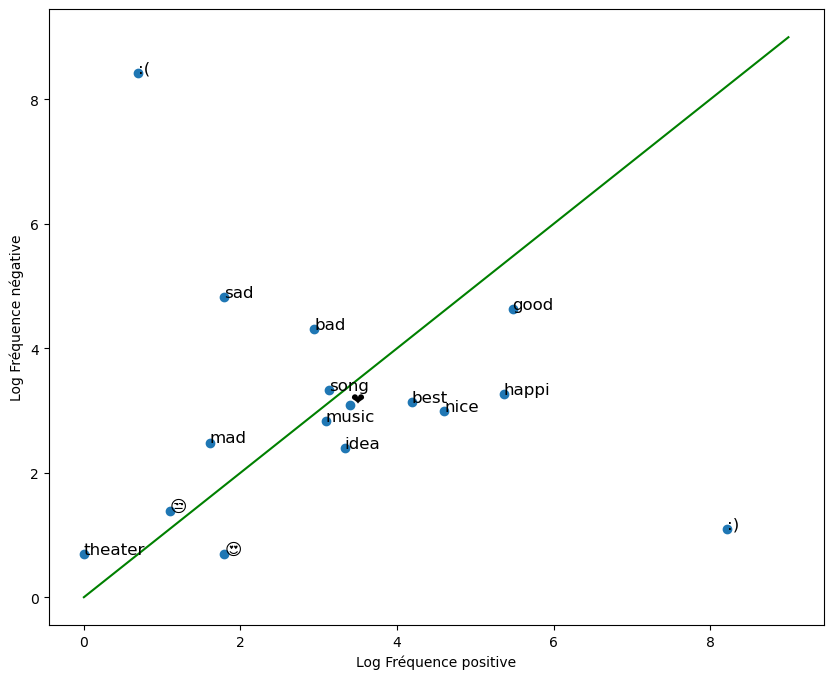

In [15]:
fig, ax = plt.subplots(figsize = (10, 8))

# conversion des fréquences (positives, négatives) en échelle log. Ajout du 1 pour éviter log(0)
x = np.log([x[1] + 1 for x in donnees])  
y = np.log([x[2] + 1 for x in donnees]) 

# dessiner un point pour chaque mot en fonction de sa fréquence positive et négative
ax.scatter(x, y)  
# Ajouter le mot
for i in range(0, len(donnees)):
    ax.annotate(donnees[i][0], (x[i], y[i]), fontsize=12)

plt.xlabel("Log Fréquence positive")
plt.ylabel("Log Fréquence négative")

ax.plot([0, 9], [0, 9], color = 'green') 
plt.show()